<a href="https://colab.research.google.com/github/datdinhstore99/abc/blob/master/Chucaiviettaykmeanclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np 

import matplotlib.pyplot as plt


In [47]:
import pandas as pd
!ls "/content/drive/My Drive"


 aielts.pdf
 Chusoviettaykmean.ipynb
'Colab Notebooks'
'Copy of Visiondocument-ANHNGUTRUCTUYEN (1).VN.gdoc'
'Copy of Visiondocument-ANHNGUTRUCTUYEN.VN.gdoc'
 dic2.txt
'Getting started.pdf'
'ielts 1 bt.pdf'
 IMG_0127.MOV
 IMG_1701.JPG
 IMG_1713.JPG
 IMG_1714.JPG
 IMG_1715.JPG
 IMG_1716.JPG
 IMG_2758.JPG
 IMG_2759.JPG
 IMG_2760.JPG
 IMG_2761.JPG
 IMG_2762.JPG
 IMG_2763.JPG
 IMG_2764.MOV
 IMG_2765.JPG
 IMG_2767.mov
 IMG_2774.mov
 IntentClassification.ipynb
 MachineLearningpr3
 ObjectDetection2.ipynb
 Phanbietnhandiennamnu.ipynb
'Phân nhóm thuật toán Machine Learning.gslides'
 tachvatthe.ipynb
 tachvatthetronganh.ipynb
 tailieutienganhsw.pdf
 Tailieu-TriTueNhanTao_new1.pdf
'_TARGET_01=_TARGET_24 (cần đợi 5 phút để Google load đủ file trước khi download)-20191017T162902Z-001.zip'
'_TARGET_01=_TARGET_24 (cần đợi 5 phút để Google load đủ file trước khi download)-20191017T162902Z-002.zip'
'Tổng hợp tài liệu các năm.rar'
'Transfer Learninghouseandman.ipynb'
'

In [48]:

data = "./"
!unzip -q "/content/drive/My Drive/MachineLearningpr3/az-handwritten-alphabets-in-csv-format.zip" -d $data

replace ./A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./A_Z Handwritten Data/A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y


In [0]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential

from keras.utils import np_utils
import keras

In [0]:
import pickle
import numpy as np
from os.path import join
from os import listdir
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct as st


class DataReader:

    def __init__(self, root_dir, type='mnist'):
        self.root_dir = root_dir
        self.type = type

    def reshape_to_plot(self, data):
        return data.reshape(data.shape[0], 28, 28).astype("uint8")

    def plot_imgs(self, in_data, n, random=False):
        data = np.array([d for d in in_data])
        data = self.reshape_to_plot(data)
        x1 = min(n//2, 5)
        if x1 == 0:
            x1 = 1
        y1 = (n//x1)
        x = min(x1, y1)
        y = max(x1, y1)
        fig, ax = plt.subplots(x, y, figsize=(5, 5))
        i = 0
        for j in range(x):
            for k in range(y):
                if random:
                    i = np.random.choice(range(len(data)))
                ax[j][k].set_axis_off()
                ax[j][k].imshow(data[i:i+1][0])
                i += 1
        plt.show()

    def plot_img(self, data):
        assert data.shape == (28*28,)
        data = data.reshape(1, 28, 28).astype('uint8')
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(data[0])
        plt.show()

    def get_train_data(self):
        filename = {'images': 'train-images-idx3-ubyte',
                    'labels': 'train-labels-idx1-ubyte'}
        labels_array = np.array([])
        data_types = {
            0x08: ('ubyte', 'B', 1),
            0x09: ('byte', 'b', 1),
            0x0B: ('>i2', 'h', 2),
            0x0C: ('>i4', 'i', 4),
            0x0D: ('>f4', 'f', 4),
            0x0E: ('>f8', 'd', 8)}
        for name in filename.keys():
            if name == 'images':
                imagesfile = open(join(self.root_dir, filename[name]), 'rb')
            if name == 'labels':
                labelsfile = open(join(self.root_dir, filename[name]), 'rb')
        imagesfile.seek(0)
        magic = st.unpack('>4B', imagesfile.read(4))
        if(magic[0] and magic[1])or(magic[2] not in data_types):
            raise ValueError("File Format not correct")
        nDim = magic[3]
        imagesfile.seek(4)
        nImg = st.unpack('>I', imagesfile.read(4))[0]  # num of images/labels
        nR = st.unpack('>I', imagesfile.read(4))[0]  # num of rows
        nC = st.unpack('>I', imagesfile.read(4))[0]  # num of columns
        nBytes = nImg*nR*nC
        # Since no. of items = no. of images and is already read
        labelsfile.seek(8)
        images_array = 255 - \
            np.asarray(st.unpack('>'+'B'*nBytes,
                                 imagesfile.read(nBytes))).reshape((nImg, nR, nC))
        labels_array = np.asarray(
            st.unpack('>'+'B'*nImg, labelsfile.read(nImg))).reshape((nImg, 1))
        labels_array = [l[0] for l in labels_array]
        return images_array.reshape(60000, 28*28), labels_array, None

In [0]:
import numpy as np
import copy
from tqdm import tqdm


class KMeans:

    def __init__(self, n_clusters=10, max_iter=500):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.loss_per_iteration = []

    def init_centroids(self):
        np.random.seed(np.random.randint(0, 100000))
        self.centroids = []
        for i in range(self.n_clusters):
            rand_index = np.random.choice(range(len(self.fit_data)))
            self.centroids.append(self.fit_data[rand_index])

    def init_clusters(self):
        self.clusters = {'data': {i: [] for i in range(self.n_clusters)}}
        self.clusters['labels'] = {i: [] for i in range(self.n_clusters)}

    def fit(self, fit_data, fit_labels):
        self.fit_data = fit_data
        self.fit_labels = fit_labels
        self.predicted_labels = [None for _ in range(self.fit_data.shape[0])]
        self.init_centroids()
        self.iterations = 0
        old_centroids = [np.zeros(shape=(fit_data.shape[1],))
                         for _ in range(self.n_clusters)]
        while not self.converged(self.iterations, old_centroids, self.centroids):
            old_centroids = copy.deepcopy(self.centroids)
            self.init_clusters()
            for j, sample in tqdm(enumerate(self.fit_data)):
                min_dist = float('inf')
                for i, centroid in enumerate(self.centroids):
                    dist = np.linalg.norm(sample-centroid)
                    if dist < min_dist:
                        min_dist = dist
                        self.predicted_labels[j] = i
                if self.predicted_labels[j] is not None:
                    self.clusters['data'][self.predicted_labels[j]].append(
                        sample)
                    self.clusters['labels'][self.predicted_labels[j]].append(
                        self.fit_labels[j])
            self.reshape_cluster()
            self.update_centroids()
            self.calculate_loss()
            print("\nIteration:", self.iterations, 'Loss:',
                  self.loss, 'Difference:', self.centroids_dist)
            self.iterations += 1
        self.calculate_accuracy()

    def update_centroids(self):
        for i in range(self.n_clusters):
            cluster = self.clusters['data'][i]
            if cluster == []:
                self.centroids[i] = self.fit_data[np.random.choice(
                    range(len(self.fit_data)))]
            else:
                self.centroids[i] = np.mean(
                    np.vstack((self.centroids[i], cluster)), axis=0)

    def reshape_cluster(self):
        for id, mat in list(self.clusters['data'].items()):
            self.clusters['data'][id] = np.array(mat)

    def converged(self, iterations, centroids, updated_centroids):
        if iterations > self.max_iter:
            return True
        self.centroids_dist = np.linalg.norm(
            np.array(updated_centroids)-np.array(centroids))
        if self.centroids_dist <= 1e-10:
            print("Converged! With distance:", self.centroids_dist)
            return True
        return False

    def calculate_loss(self):
        self.loss = 0
        for key, value in list(self.clusters['data'].items()):
            if value is not None:
                for v in value:
                    self.loss += np.linalg.norm(v-self.centroids[key])
        self.loss_per_iteration.append(self.loss)

    def calculate_accuracy(self):
        self.clusters_labels = []
        self.clusters_info = []
        self.clusters_accuracy = []
        for clust, labels in list(self.clusters['labels'].items()):
            if isinstance(labels[0], (np.ndarray)):
                labels = [l[0] for l in labels]
            occur = 0
            max_label = max(set(labels), key=labels.count)
            self.clusters_labels.append(max_label)
            for label in labels:
                if label == max_label:
                    occur += 1
            acc = occur/len(list(labels))
            self.clusters_info.append(
                [max_label, occur, len(list(labels)), acc])
            self.clusters_accuracy.append(acc)
            self.accuracy = sum(self.clusters_accuracy)/self.n_clusters
        self.labels_ = []
        for i in range(len(self.predicted_labels)):
            self.labels_.append(self.clusters_labels[self.predicted_labels[i]])
        print('[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy]', self.clusters_info)
        print('Accuracy:', self.accuracy)

In [0]:
# import os
# os.chdir('KMeans-MNIST')
# from DataReader import DataReader
# from KMeans import KMeans
import matplotlib.pyplot as plt
import numpy as np



In [0]:
train_link = data + "A_Z Handwritten Data.csv"
import pickle
with open(train_link, mode="r") as csv_file:
    result = csv.reader(csv_file)
    rows = []
    
    # đọc từng dòng của file và thêm vào list rows, mỗi phần tử của list là một dòng
    for row in result:
        rows.append(row)
letter = rows[100000]
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28,28)

In [0]:
train_data = [] # dữ liệu training
train_label = [] # label của chúng

for letter in rows :
  if letter[0] == '0' or (letter[0] == '1') or (letter[0] == '2') or (letter[0] == '3') or (letter[0] == '4') or (letter[0] == '5') or (letter[0] == '6') or (letter[0] == '7') or (letter[0] == '8') or (letter[0] == '9'):
      x = np.array([int(j) for j in letter[1:]])
      train_data.append(x)
      train_label.append(int(letter[0]))
  else:
      break

In [55]:
print(len(train_label))


print(train_label)

91277
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
import random

shuffle_order = list(range(91277))
random.shuffle(shuffle_order)

train_data = np.array(train_data)
train_label = np.array(train_label)

train_data = train_data[shuffle_order]
train_label = train_label[shuffle_order]

9


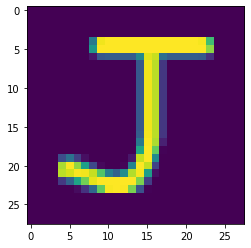

In [57]:
print(train_label[106])
x = train_data[106].reshape(28,28)
plt.imshow(x)


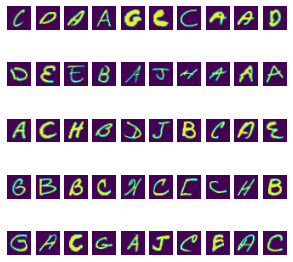

In [59]:
data_reader.plot_imgs(train_data,50,True)

In [60]:
kmeans = KMeans(n_clusters= 10,max_iter=200)
kmeans.fit(train_data,train_label)


91277it [00:11, 8053.99it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
784it [00:00, 7838.51it/s]


Iteration: 0 Loss: 158208605.32087612 Difference: 7807.933145205587


91277it [00:10, 8404.04it/s]
851it [00:00, 8504.25it/s]


Iteration: 1 Loss: 153131358.34788027 Difference: 4275.21401496427


91277it [00:11, 8295.41it/s]
853it [00:00, 8529.99it/s]


Iteration: 2 Loss: 151777918.90132138 Difference: 833.5236224098153


91277it [00:10, 8546.32it/s]
857it [00:00, 8568.29it/s]


Iteration: 3 Loss: 151185123.36750266 Difference: 443.04643089541776


91277it [00:10, 8498.60it/s]
824it [00:00, 8230.77it/s]


Iteration: 4 Loss: 150880120.26815087 Difference: 294.0251081649761


91277it [00:11, 8195.99it/s]
782it [00:00, 7810.18it/s]


Iteration: 5 Loss: 150717362.8762308 Difference: 210.61526683128952


91277it [00:10, 8377.10it/s]
869it [00:00, 8685.89it/s]


Iteration: 6 Loss: 150609125.3208742 Difference: 152.35915037043796


91277it [00:10, 8307.77it/s]
880it [00:00, 8793.66it/s]


Iteration: 7 Loss: 150532682.8451512 Difference: 126.83142448414769


91277it [00:10, 8355.94it/s]
730it [00:00, 7296.68it/s]


Iteration: 8 Loss: 150477331.40082815 Difference: 110.24393102669215


91277it [00:10, 8381.82it/s]
875it [00:00, 8744.71it/s]


Iteration: 9 Loss: 150437237.0815807 Difference: 93.85041561792225


91277it [00:10, 8458.12it/s]
879it [00:00, 8787.96it/s]


Iteration: 10 Loss: 150408894.52538845 Difference: 79.04284265331064


91277it [00:10, 8626.44it/s]
821it [00:00, 8204.57it/s]


Iteration: 11 Loss: 150390593.5950334 Difference: 68.89184227293275


91277it [00:10, 8478.18it/s]
860it [00:00, 8599.68it/s]


Iteration: 12 Loss: 150376788.53419343 Difference: 55.27226637813291


91277it [00:10, 8556.16it/s]
883it [00:00, 8825.51it/s]


Iteration: 13 Loss: 150365045.21357232 Difference: 47.858625664173914


91277it [00:10, 8621.99it/s]
878it [00:00, 8776.26it/s]


Iteration: 14 Loss: 150356386.7441188 Difference: 45.94743408154876


91277it [00:10, 8405.29it/s]
875it [00:00, 8749.09it/s]


Iteration: 15 Loss: 150349691.8807194 Difference: 38.8494706696059


91277it [00:10, 8323.50it/s]
876it [00:00, 8755.50it/s]


Iteration: 16 Loss: 150344969.88921717 Difference: 35.84978119446968


91277it [00:10, 8528.35it/s]
784it [00:00, 7836.63it/s]


Iteration: 17 Loss: 150340095.16808856 Difference: 32.449792542829044


91277it [00:10, 8573.61it/s]
823it [00:00, 8223.66it/s]


Iteration: 18 Loss: 150336501.78400823 Difference: 31.145827905463044


91277it [00:10, 8445.62it/s]
741it [00:00, 7406.07it/s]


Iteration: 19 Loss: 150333738.41288632 Difference: 28.59237482100547


91277it [00:10, 8491.97it/s]
777it [00:00, 7769.62it/s]


Iteration: 20 Loss: 150331427.20230606 Difference: 24.557588192853263


91277it [00:10, 8429.91it/s]
841it [00:00, 8404.76it/s]


Iteration: 21 Loss: 150329210.46289858 Difference: 23.10510469810373


91277it [00:10, 8459.86it/s]
855it [00:00, 8544.10it/s]


Iteration: 22 Loss: 150326899.31538066 Difference: 23.26523489021581


91277it [00:10, 8510.57it/s]
876it [00:00, 8758.88it/s]


Iteration: 23 Loss: 150324603.11108747 Difference: 21.716091086609815


91277it [00:10, 8642.62it/s]
672it [00:00, 6714.74it/s]


Iteration: 24 Loss: 150322540.40942067 Difference: 22.48879135927073


91277it [00:10, 8415.54it/s]
887it [00:00, 8861.71it/s]


Iteration: 25 Loss: 150321071.73415762 Difference: 20.49566620178373


91277it [00:10, 8453.69it/s]
862it [00:00, 8614.75it/s]


Iteration: 26 Loss: 150320239.29202786 Difference: 18.874346529868017


91277it [00:10, 8569.44it/s]
749it [00:00, 7483.46it/s]


Iteration: 27 Loss: 150319436.45873663 Difference: 17.05900467951356


91277it [00:10, 8601.13it/s]
878it [00:00, 8776.87it/s]


Iteration: 28 Loss: 150318703.74731046 Difference: 16.68610654104612


91277it [00:10, 8697.99it/s]
904it [00:00, 9031.63it/s]


Iteration: 29 Loss: 150318457.3332094 Difference: 14.942180656817468


91277it [00:10, 8515.91it/s]
858it [00:00, 8571.18it/s]


Iteration: 30 Loss: 150318085.66710663 Difference: 10.963202677438316


91277it [00:10, 8684.09it/s]
736it [00:00, 7356.62it/s]


Iteration: 31 Loss: 150317537.1691296 Difference: 10.763128020814866


91277it [00:10, 8364.92it/s]
820it [00:00, 8193.39it/s]


Iteration: 32 Loss: 150317126.26195696 Difference: 10.08419726820908


91277it [00:10, 8599.66it/s]
869it [00:00, 8687.56it/s]


Iteration: 33 Loss: 150316818.60441872 Difference: 9.370878835424598


91277it [00:10, 8580.09it/s]
888it [00:00, 8877.64it/s]


Iteration: 34 Loss: 150316771.92880204 Difference: 8.971806750964


91277it [00:10, 8693.03it/s]
787it [00:00, 7865.73it/s]


Iteration: 35 Loss: 150316592.6376499 Difference: 8.631966628535379


91277it [00:10, 8570.99it/s]
880it [00:00, 8791.54it/s]


Iteration: 36 Loss: 150316255.4312355 Difference: 7.88241437199728


91277it [00:10, 8553.14it/s]
826it [00:00, 8259.75it/s]


Iteration: 37 Loss: 150316121.00134796 Difference: 6.239330628996289


91277it [00:10, 8576.65it/s]
835it [00:00, 8346.84it/s]


Iteration: 38 Loss: 150316201.64417946 Difference: 5.85729801559067


91277it [00:11, 8226.41it/s]
864it [00:00, 8634.92it/s]


Iteration: 39 Loss: 150316248.69184533 Difference: 5.213703081995615


91277it [00:10, 8299.47it/s]
802it [00:00, 8016.13it/s]


Iteration: 40 Loss: 150316332.42650384 Difference: 4.8570804016324


91277it [00:11, 8130.42it/s]
775it [00:00, 7748.53it/s]


Iteration: 41 Loss: 150316453.43921906 Difference: 5.126903532303861


91277it [00:10, 8347.35it/s]
870it [00:00, 8697.79it/s]


Iteration: 42 Loss: 150316520.61147556 Difference: 5.082282890965729


91277it [00:10, 8478.71it/s]
832it [00:00, 8316.91it/s]


Iteration: 43 Loss: 150316547.0489897 Difference: 6.402841215526524


91277it [00:10, 8461.05it/s]
795it [00:00, 7946.24it/s]


Iteration: 44 Loss: 150316667.72660205 Difference: 5.887915663594788


91277it [00:10, 8487.50it/s]
752it [00:00, 7512.16it/s]


Iteration: 45 Loss: 150316783.62736124 Difference: 6.302614330515763


91277it [00:11, 8285.78it/s]
820it [00:00, 8195.51it/s]


Iteration: 46 Loss: 150316839.3678406 Difference: 7.155694655151789


91277it [00:10, 8628.36it/s]
872it [00:00, 8713.88it/s]


Iteration: 47 Loss: 150316658.02838305 Difference: 8.439449045960147


91277it [00:10, 8416.12it/s]
856it [00:00, 8553.42it/s]


Iteration: 48 Loss: 150316504.94387245 Difference: 9.279833176464534


91277it [00:10, 8613.11it/s]
741it [00:00, 7407.00it/s]


Iteration: 49 Loss: 150316571.94597977 Difference: 9.917232129425496


91277it [00:10, 8520.86it/s]
643it [00:00, 6416.86it/s]


Iteration: 50 Loss: 150316542.22048256 Difference: 9.185753342535142


91277it [00:10, 8379.02it/s]
878it [00:00, 8774.86it/s]


Iteration: 51 Loss: 150316681.74744454 Difference: 9.798065309571589


91277it [00:10, 8573.38it/s]
654it [00:00, 6538.88it/s]


Iteration: 52 Loss: 150316729.76802188 Difference: 6.976759146868673


91277it [00:10, 8436.67it/s]
853it [00:00, 8527.10it/s]


Iteration: 53 Loss: 150316920.90641695 Difference: 5.724408764553299


91277it [00:10, 8609.15it/s]
841it [00:00, 8407.66it/s]


Iteration: 54 Loss: 150317074.69838038 Difference: 4.998403569223732


91277it [00:10, 8382.81it/s]
822it [00:00, 8217.89it/s]


Iteration: 55 Loss: 150317052.49688134 Difference: 4.3645387461083365


91277it [00:11, 8261.52it/s]
826it [00:00, 8256.15it/s]


Iteration: 56 Loss: 150317068.83600056 Difference: 4.579975576045365


91277it [00:10, 8357.47it/s]
759it [00:00, 7583.12it/s]


Iteration: 57 Loss: 150317233.43779105 Difference: 5.048783269751418


91277it [00:10, 8499.58it/s]
793it [00:00, 7927.83it/s]


Iteration: 58 Loss: 150317266.94074684 Difference: 5.543036320114295


91277it [00:11, 8273.39it/s]
847it [00:00, 8463.53it/s]


Iteration: 59 Loss: 150317164.22747913 Difference: 5.252961741084569


91277it [00:10, 8371.24it/s]
839it [00:00, 8384.13it/s]


Iteration: 60 Loss: 150317158.24325916 Difference: 4.149323391927625


91277it [00:10, 8377.13it/s]
854it [00:00, 8536.71it/s]


Iteration: 61 Loss: 150317197.87313485 Difference: 2.996029679884268


91277it [00:10, 8608.56it/s]
882it [00:00, 8815.07it/s]


Iteration: 62 Loss: 150317106.94943035 Difference: 4.225799757087678


91277it [00:10, 8456.08it/s]
764it [00:00, 7638.39it/s]


Iteration: 63 Loss: 150317103.17992276 Difference: 5.781823577184784


91277it [00:10, 8503.38it/s]
727it [00:00, 7264.55it/s]


Iteration: 64 Loss: 150316995.26529297 Difference: 4.809077969024586


91277it [00:10, 8519.42it/s]
762it [00:00, 7613.85it/s]


Iteration: 65 Loss: 150316917.4013695 Difference: 4.960420999222319


91277it [00:10, 8356.91it/s]
760it [00:00, 7592.95it/s]


Iteration: 66 Loss: 150317053.80507722 Difference: 4.238276065188844


91277it [00:10, 8475.50it/s]
855it [00:00, 8542.02it/s]


Iteration: 67 Loss: 150316995.27762341 Difference: 3.712711047499697


91277it [00:10, 8398.26it/s]
784it [00:00, 7833.77it/s]


Iteration: 68 Loss: 150317091.04118615 Difference: 3.7566027952723933


91277it [00:10, 8369.99it/s]
834it [00:00, 8330.45it/s]


Iteration: 69 Loss: 150316960.52584845 Difference: 3.4051814167445857


91277it [00:10, 8455.42it/s]
726it [00:00, 7259.76it/s]


Iteration: 70 Loss: 150316857.04594812 Difference: 3.2756014153907786


91277it [00:10, 8419.38it/s]
800it [00:00, 7995.15it/s]


Iteration: 71 Loss: 150316897.8947128 Difference: 3.472446894223921


91277it [00:10, 8406.38it/s]
808it [00:00, 8072.16it/s]


Iteration: 72 Loss: 150316941.20975432 Difference: 2.9288684773686575


91277it [00:10, 8408.55it/s]
864it [00:00, 8632.64it/s]


Iteration: 73 Loss: 150316832.06027102 Difference: 2.0733396750023605


91277it [00:10, 8488.60it/s]
847it [00:00, 8466.37it/s]


Iteration: 74 Loss: 150316821.97743726 Difference: 2.667554189596051


91277it [00:10, 8391.95it/s]
818it [00:00, 8171.69it/s]


Iteration: 75 Loss: 150317049.83586287 Difference: 2.9962781980378455


91277it [00:10, 8497.16it/s]
858it [00:00, 8571.57it/s]


Iteration: 76 Loss: 150317166.00071225 Difference: 3.5925778469122465


91277it [00:11, 8277.55it/s]
696it [00:00, 6957.62it/s]


Iteration: 77 Loss: 150317290.98927784 Difference: 3.0429864670913007


91277it [00:11, 8255.73it/s]
815it [00:00, 8148.71it/s]


Iteration: 78 Loss: 150317375.46735844 Difference: 3.3565365454926006


91277it [00:11, 7890.66it/s]
639it [00:00, 6382.90it/s]


Iteration: 79 Loss: 150317347.67633224 Difference: 3.738577689961496


91277it [00:11, 7867.51it/s]
707it [00:00, 7069.94it/s]


Iteration: 80 Loss: 150317325.91148642 Difference: 4.627769105902996


91277it [00:11, 7777.47it/s]
810it [00:00, 8098.33it/s]


Iteration: 81 Loss: 150317197.5375674 Difference: 4.019320609725459


91277it [00:11, 8023.64it/s]
835it [00:00, 8344.84it/s]


Iteration: 82 Loss: 150317357.45856002 Difference: 3.896882956157581


91277it [00:11, 7953.99it/s]
799it [00:00, 7983.38it/s]


Iteration: 83 Loss: 150317367.86974213 Difference: 3.8601514279265956


91277it [00:11, 7879.49it/s]
729it [00:00, 7286.62it/s]


Iteration: 84 Loss: 150317455.99633616 Difference: 2.9463021129998004


91277it [00:11, 7969.07it/s]
798it [00:00, 7972.25it/s]


Iteration: 85 Loss: 150317495.68502033 Difference: 2.990755537828145


91277it [00:11, 8267.83it/s]
771it [00:00, 7703.16it/s]


Iteration: 86 Loss: 150317580.9549297 Difference: 2.9812888112497107


91277it [00:10, 8349.23it/s]
825it [00:00, 8244.92it/s]


Iteration: 87 Loss: 150317664.78040674 Difference: 3.418366143891724


91277it [00:10, 8306.29it/s]
783it [00:00, 7829.13it/s]


Iteration: 88 Loss: 150317642.46930504 Difference: 2.9831990642453072


91277it [00:10, 8477.39it/s]
747it [00:00, 7469.63it/s]


Iteration: 89 Loss: 150317695.7290142 Difference: 3.8970596513232865


91277it [00:10, 8347.72it/s]
827it [00:00, 8264.63it/s]


Iteration: 90 Loss: 150317570.8529428 Difference: 3.121874957089574


91277it [00:10, 8625.78it/s]
798it [00:00, 7979.74it/s]


Iteration: 91 Loss: 150317485.139552 Difference: 3.432418790404402


91277it [00:10, 8462.94it/s]
821it [00:00, 8203.38it/s]


Iteration: 92 Loss: 150317493.02079096 Difference: 3.3227815031130157


91277it [00:10, 8694.31it/s]
885it [00:00, 8845.92it/s]


Iteration: 93 Loss: 150317447.63009948 Difference: 3.01350138980393


91277it [00:10, 8459.41it/s]
875it [00:00, 8748.88it/s]


Iteration: 94 Loss: 150317433.1507842 Difference: 2.4439932866563705


91277it [00:10, 8386.91it/s]
647it [00:00, 6464.61it/s]


Iteration: 95 Loss: 150317431.00591817 Difference: 2.0141054057346355


91277it [00:10, 8495.49it/s]
767it [00:00, 7662.85it/s]


Iteration: 96 Loss: 150317356.57082245 Difference: 2.2497820117923792


91277it [00:10, 8551.71it/s]
773it [00:00, 7721.94it/s]


Iteration: 97 Loss: 150317313.6093906 Difference: 2.8661419555753485


91277it [00:10, 8482.22it/s]
877it [00:00, 8761.42it/s]


Iteration: 98 Loss: 150317190.08315963 Difference: 3.0351080231110674


91277it [00:10, 8416.79it/s]
798it [00:00, 7968.95it/s]


Iteration: 99 Loss: 150317151.99597922 Difference: 2.3993938236247367


91277it [00:10, 8477.67it/s]
722it [00:00, 7218.20it/s]


Iteration: 100 Loss: 150317081.0083849 Difference: 2.220309393068454


91277it [00:10, 8529.44it/s]
846it [00:00, 8456.26it/s]


Iteration: 101 Loss: 150316957.16429183 Difference: 2.8312345499726708


91277it [00:10, 8744.49it/s]
877it [00:00, 8766.31it/s]


Iteration: 102 Loss: 150316777.56710413 Difference: 2.8135934659332094


91277it [00:10, 8482.13it/s]
864it [00:00, 8633.71it/s]


Iteration: 103 Loss: 150316566.69615415 Difference: 3.022735368735363


91277it [00:10, 8518.56it/s]
864it [00:00, 8631.22it/s]


Iteration: 104 Loss: 150316682.00522378 Difference: 3.1301524085461176


91277it [00:10, 8439.30it/s]
732it [00:00, 7317.32it/s]


Iteration: 105 Loss: 150316658.86933988 Difference: 2.766355646579239


91277it [00:10, 8686.10it/s]
832it [00:00, 8318.00it/s]


Iteration: 106 Loss: 150316688.59075052 Difference: 2.3860600987697906


91277it [00:10, 8386.27it/s]
852it [00:00, 8517.57it/s]


Iteration: 107 Loss: 150316746.04773363 Difference: 2.1483481420077144


91277it [00:10, 8576.29it/s]
888it [00:00, 8872.73it/s]


Iteration: 108 Loss: 150316786.9557656 Difference: 0.6844191001888951


91277it [00:10, 8538.18it/s]
838it [00:00, 8378.75it/s]


Iteration: 109 Loss: 150316822.18811598 Difference: 0.891531339748704


91277it [00:10, 8434.72it/s]
856it [00:00, 8555.01it/s]


Iteration: 110 Loss: 150316834.0283129 Difference: 1.100716204725119


91277it [00:10, 8676.33it/s]
920it [00:00, 9199.22it/s]


Iteration: 111 Loss: 150316838.3433996 Difference: 0.8582614206347368


91277it [00:10, 8635.20it/s]
914it [00:00, 9131.76it/s]


Iteration: 112 Loss: 150316765.25025952 Difference: 1.2374197429118297


91277it [00:10, 8638.81it/s]
916it [00:00, 9154.77it/s]


Iteration: 113 Loss: 150316748.12932596 Difference: 1.4066804736889555


91277it [00:10, 8497.79it/s]
844it [00:00, 8432.65it/s]


Iteration: 114 Loss: 150316747.57076362 Difference: 1.1172702789147557


91277it [00:10, 8607.05it/s]
806it [00:00, 8059.97it/s]


Iteration: 115 Loss: 150316751.85991794 Difference: 0.5225282441734131


91277it [00:10, 8564.11it/s]
821it [00:00, 8199.59it/s]


Iteration: 116 Loss: 150316746.42227715 Difference: 0.751602284467606


91277it [00:10, 8837.25it/s]
933it [00:00, 9324.67it/s]


Iteration: 117 Loss: 150316717.0966922 Difference: 1.0355497167581185


91277it [00:10, 8651.17it/s]
904it [00:00, 9034.84it/s]


Iteration: 118 Loss: 150316720.01997954 Difference: 1.355642338339378


91277it [00:10, 8604.75it/s]
865it [00:00, 8645.43it/s]


Iteration: 119 Loss: 150316739.03698072 Difference: 1.2652063616607894


91277it [00:10, 8731.70it/s]
764it [00:00, 7635.67it/s]


Iteration: 120 Loss: 150316700.45289698 Difference: 1.7156130798868026


91277it [00:10, 8588.60it/s]
869it [00:00, 8686.51it/s]


Iteration: 121 Loss: 150316698.96672603 Difference: 2.078498509810566


91277it [00:10, 8506.98it/s]
760it [00:00, 7597.44it/s]


Iteration: 122 Loss: 150316803.84020242 Difference: 2.313730502874837


91277it [00:10, 8461.85it/s]
794it [00:00, 7934.58it/s]


Iteration: 123 Loss: 150316870.14560562 Difference: 2.0561169473322947


91277it [00:10, 8461.38it/s]
834it [00:00, 8339.33it/s]


Iteration: 124 Loss: 150316886.15609717 Difference: 2.072191893213333


91277it [00:10, 8511.23it/s]
839it [00:00, 8389.59it/s]


Iteration: 125 Loss: 150316984.73133484 Difference: 1.7174823112940587


91277it [00:10, 8612.54it/s]
841it [00:00, 8403.28it/s]


Iteration: 126 Loss: 150317037.7671985 Difference: 1.3535071215999714


91277it [00:10, 8441.03it/s]
704it [00:00, 7033.18it/s]


Iteration: 127 Loss: 150317018.3684085 Difference: 1.3837608264147736


91277it [00:10, 8458.92it/s]
870it [00:00, 8693.21it/s]


Iteration: 128 Loss: 150316968.1474537 Difference: 1.4522458961082565


91277it [00:10, 8394.80it/s]
766it [00:00, 7652.53it/s]


Iteration: 129 Loss: 150316994.3377549 Difference: 1.9192536795448527


91277it [00:10, 8603.97it/s]
687it [00:00, 6869.92it/s]


Iteration: 130 Loss: 150316983.73011345 Difference: 1.5814389557228878


91277it [00:10, 8322.05it/s]
741it [00:00, 7407.89it/s]


Iteration: 131 Loss: 150317015.44050354 Difference: 1.375850291584795


91277it [00:10, 8544.09it/s]
789it [00:00, 7887.75it/s]


Iteration: 132 Loss: 150317018.7939588 Difference: 1.6536663391903306


91277it [00:10, 8450.42it/s]
808it [00:00, 8077.72it/s]


Iteration: 133 Loss: 150317005.95224014 Difference: 1.629376907275538


91277it [00:10, 8482.24it/s]
828it [00:00, 8278.03it/s]


Iteration: 134 Loss: 150317011.19676143 Difference: 1.4030793470645937


91277it [00:10, 8592.72it/s]
770it [00:00, 7696.67it/s]


Iteration: 135 Loss: 150317002.95412052 Difference: 1.3021343649498036


91277it [00:10, 8396.93it/s]
898it [00:00, 8978.60it/s]


Iteration: 136 Loss: 150316982.14298663 Difference: 1.13389138256143


91277it [00:10, 8524.62it/s]
835it [00:00, 8343.58it/s]


Iteration: 137 Loss: 150317003.5254894 Difference: 0.9383003630330803


91277it [00:10, 8353.04it/s]
835it [00:00, 8347.74it/s]


Iteration: 138 Loss: 150317018.42177066 Difference: 0.963184718352948


91277it [00:10, 8430.81it/s]
811it [00:00, 8106.72it/s]


Iteration: 139 Loss: 150317024.52482572 Difference: 0.5070504334161335


91277it [00:10, 8348.50it/s]
860it [00:00, 8592.92it/s]


Iteration: 140 Loss: 150317024.5251702 Difference: 0.5026929751052962


91277it [00:10, 8526.83it/s]
841it [00:00, 8403.34it/s]


Iteration: 141 Loss: 150317024.5251706 Difference: 5.327635721386498e-05


91277it [00:10, 8554.81it/s]



Iteration: 142 Loss: 150317024.52517056 Difference: 5.692672382578706e-09
Converged! With distance: 6.712695948499795e-13
[cluster_label,no_occurence_of_label,total_samples_in_cluster,cluster_accuracy] [[4, 2442, 8705, 0.2805284319356692], [0, 3591, 9544, 0.37625733445096393], [9, 5909, 10431, 0.5664845173041895], [0, 5838, 9235, 0.632160259880888], [3, 4654, 8472, 0.5493389990557129], [2, 5007, 10213, 0.49025751493194947], [2, 5568, 6588, 0.8451730418943534], [7, 3344, 7750, 0.43148387096774193], [2, 5385, 11394, 0.47261716692996314], [2, 5422, 8945, 0.6061486864169927]]
Accuracy: 0.5250449823768424


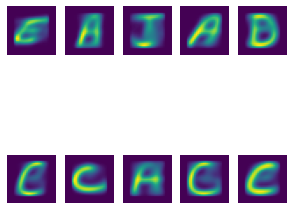

In [61]:
data_reader.plot_imgs(kmeans.centroids,len(kmeans.centroids))


Loss


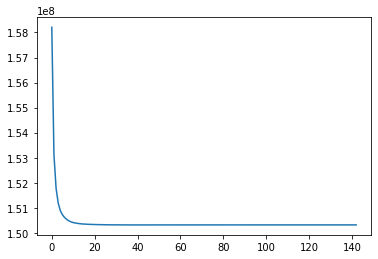

In [62]:
print('Loss')
plt.plot(range(kmeans.iterations),kmeans.loss_per_iteration)
plt.show()



Cluster: 0 Label: 4


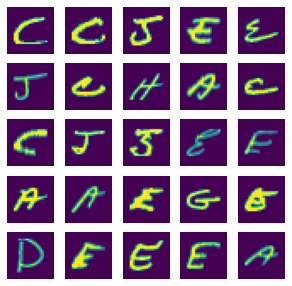

Cluster: 1 Label: 0


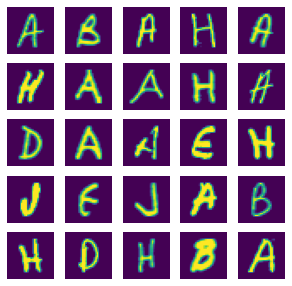

Cluster: 2 Label: 9


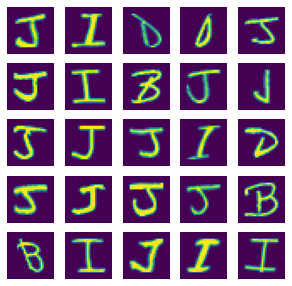

Cluster: 3 Label: 0


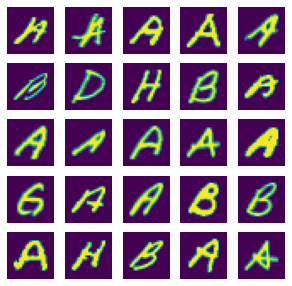

Cluster: 4 Label: 3


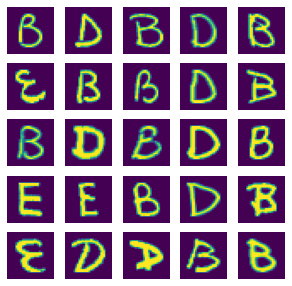

Cluster: 5 Label: 2


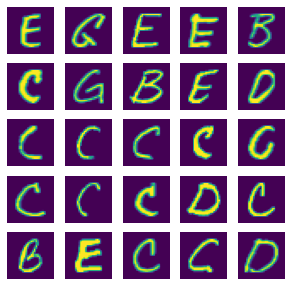

Cluster: 6 Label: 2


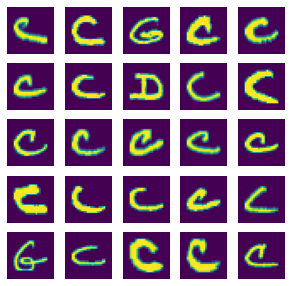

Cluster: 7 Label: 7


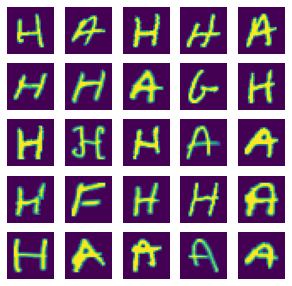

Cluster: 8 Label: 2


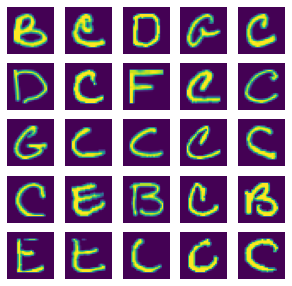

Cluster: 9 Label: 2


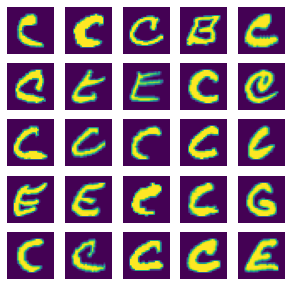

In [63]:

for key,data in list(kmeans.clusters['data'].items()):
    print('Cluster:',key,'Label:',kmeans.clusters_labels[key])
    data_reader.plot_imgs(data[:min(25,data.shape[0])],min(25,data.shape[0]))

In [64]:
print('[cluster_label,no_occurrence_of_label,total_samples_in_cluster,cluster_accuracy]\n',kmeans.clusters_info)
print('Accuracy:',kmeans.accuracy)


[cluster_label,no_occurrence_of_label,total_samples_in_cluster,cluster_accuracy]
 [[4, 2442, 8705, 0.2805284319356692], [0, 3591, 9544, 0.37625733445096393], [9, 5909, 10431, 0.5664845173041895], [0, 5838, 9235, 0.632160259880888], [3, 4654, 8472, 0.5493389990557129], [2, 5007, 10213, 0.49025751493194947], [2, 5568, 6588, 0.8451730418943534], [7, 3344, 7750, 0.43148387096774193], [2, 5385, 11394, 0.47261716692996314], [2, 5422, 8945, 0.6061486864169927]]
Accuracy: 0.5250449823768424
